## 시기별 거리두기 정책을 고려한 판매율 전처리
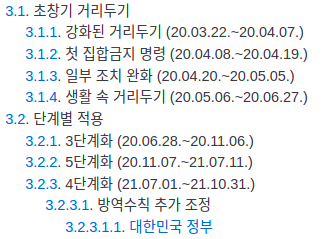

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/2023빅콘/data/final_data.csv')

<ipython-input-40-b6ad22795497>:3: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/2023빅콘/data/final_data.csv')


In [ ]:
df.head(2)

,연령,성별,예매일자,예매시간,공연일자,공연시작시간,좌석,결제가격,취소여부,할인내역,...,싹틔우미,노블,골드,블루,그린,층,블록,열,좌석번호,멤버십점수
0,50.0,M,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,...,0,0,0,0,0,1,B,12,7,1
1,50.0,F,20220220,1410,2022-03-02,1930,합창석 G블록2열 24,110000,2,일반,...,0,0,1,0,1,0,G,2,24,9


# 공연 정보에 대한 데이터로 다시 전처리

In [ ]:
df.columns

Index(['연령', '성별', '예매일자', '예매시간', '공연일자', '공연시작시간', '좌석', '결제가격', '취소여부',
       '할인내역', '선예매시작일', '예매시작일', '장르', '휴게시간', '회원여부', '공연명', '내한여부', '출연진',
       '제작진', '러닝타임', '관람연령', '제작사', '가격종류', 'R석', 'S석', 'A석', '티켓판매량', '요일',
       '멤버십', '무료', '싹틔우미', '노블', '골드', '블루', '그린', '층', '블록', '열', '좌석번호',
       '멤버십점수'],
      dtype='object')

## 선예매 여부

In [ ]:
df['선예매시작일']

0         20220109.0
1         20220109.0
2         20220109.0
3         20220109.0
4         20220109.0
             ...    
793908    20211105.0
793909    20211105.0
793910    20211105.0
793911    20211105.0
793912    20211105.0
Name: 선예매시작일, Length: 793913, dtype: float64

In [ ]:
df['선예매여부'] = df['선예매시작일'].notna().astype(int)

In [ ]:
df.head(1)

,연령,성별,예매일자,예매시간,공연일자,공연시작시간,좌석,결제가격,취소여부,할인내역,...,노블,골드,블루,그린,층,블록,열,좌석번호,멤버십점수,선예매여부
0,50.0,M,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,...,0,0,0,0,1,B,12,7,1,1


## 가격 종류 -> len

In [ ]:
import ast

# 문자열을 리스트로 변환
df['가격종류'] = df['가격종류'].apply(ast.literal_eval)

# 리스트의 길이로 값을 변경
df['가격종류'] = df['가격종류'].apply(len)

In [ ]:
df['가격종류']

0         3
1         3
2         3
3         3
4         3
         ..
793908    4
793909    4
793910    4
793911    4
793912    4
Name: 가격종류, Length: 793913, dtype: int64

# 판매율

In [ ]:
df.columns

Index(['연령', '성별', '예매일자', '예매시간', '공연일자', '공연시작시간', '좌석', '결제가격', '취소여부',
       '할인내역', '선예매시작일', '예매시작일', '장르', '휴게시간', '회원여부', '공연명', '내한여부', '출연진',
       '제작진', '러닝타임', '관람연령', '제작사', '가격종류', 'R석', 'S석', 'A석', '티켓판매량', '요일',
       '멤버십', '무료', '싹틔우미', '노블', '골드', '블루', '그린', '층', '블록', '열', '좌석번호',
       '멤버십점수', '선예매여부'],
      dtype='object')

In [ ]:
# 남길 컬럼 정의
keep_cols = ['공연일자', '공연시작시간', '선예매여부', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임', '가격종류', 'R석', 'A석', '요일', '취소여부']

# 카운트할 컬럼을 정의
count_cols = ['공연일자', '공연시작시간', '선예매여부', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임', '가격종류', 'R석', 'A석', '요일']

In [ ]:
df = df[keep_cols]

df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,취소여부
0,2022-03-02,1930,1,20220110.0,독주,0,"국립합창단 위대한 합창 Ⅰ, 칼 오르프 & 카르미나 부라나",0,1시간 10분,3,30000.0,10000.0,2,0


In [ ]:
len(df)

793913

## 판매량

In [ ]:
df['취소여부'].unique()

array([0, 2])

In [ ]:
# '취소여부'가 0인 행들을 카운트
grouped = df[df['취소여부'] == 0].groupby(count_cols).size().reset_index(name='티켓판매량')

In [ ]:
grouped.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,티켓판매량
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1537


In [ ]:
len(grouped)

516

In [ ]:
len(df)

793913

In [ ]:
# '취소여부' 칼럼 삭제
df = df.drop(columns=['취소여부'])

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일
0,2022-03-02,1930,1,20220110.0,독주,0,"국립합창단 위대한 합창 Ⅰ, 칼 오르프 & 카르미나 부라나",0,1시간 10분,3,30000.0,10000.0,2


In [ ]:
# 중복 제거켓
# df = df.drop_duplicates()

df = df.groupby(count_cols).size().reset_index(name='결제내역수')

In [ ]:
len(df)

516

In [ ]:
# '티켓판매량' 칼럼을 제외한 컬럼들을 추출
join_cols_cnt = grouped.columns[grouped.columns != '티켓판매량'].tolist()

# left join 수행
df = pd.merge(df, grouped, on=join_cols_cnt, how='left')

# '티켓판매량'에서 NaN 값을 0으로 채우기 (취소되지 않은 경우)
# df['티켓판매량'] = df['티켓판매량'].fillna(0).astype(int)

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537


In [ ]:
len(df)

516

## 판매율

In [ ]:
def categorize_distance_maintenance(date_str):
    # 문자열로 된 날짜를 datetime 객체로 변환
    date = pd.to_datetime(date_str, format='%Y-%m-%d')

    # 거리두기 분류
    if pd.to_datetime('2020-03-22') <= date <= pd.to_datetime('2020-04-07'):
        return '강화된 거리두기' # 2505
    elif pd.to_datetime('2020-04-08') <= date <= pd.to_datetime('2020-04-19'):
        return '첫 집합금지 명령' # 2505
    elif pd.to_datetime('2020-04-20') <= date <= pd.to_datetime('2020-05-05'):
        return '일부 조치 완화' # 2505
    elif pd.to_datetime('2020-05-06') <= date <= pd.to_datetime('2020-06-27'):
        return '생활 속 거리두기' # 2505
    elif pd.to_datetime('2020-06-28') <= date <= pd.to_datetime('2020-11-06'):
        return '3단계' # 1203
    elif pd.to_datetime('2020-11-07') <= date <= pd.to_datetime('2021-07-11'):
        return '5단계' # 1203
    elif pd.to_datetime('2021-07-01') <= date <= pd.to_datetime('2021-10-31'):
        return '4단계' # 2505
    else:
        return '기타/미정의'

df['거리두기'] = df['공연일자'].apply(categorize_distance_maintenance)

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,거리두기
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537,기타/미정의


In [ ]:
df.loc[df['거리두기'].isin(['3단계', '5단계']), '전체좌석'] = 1203
df.loc[~df['거리두기'].isin(['3단계', '5단계']), '전체좌석'] = 2505

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,거리두기,전체좌석
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537,기타/미정의,2505.0


In [ ]:
df['판매율'] = df['티켓판매량'] / df['전체좌석']

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,거리두기,전체좌석,판매율
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537,기타/미정의,2505.0,0.613573


In [ ]:
df[df['판매율'] >= 1.0]

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,거리두기,전체좌석,판매율
90,2019-09-08,1700,0,20190728.0,클래식,20,넥스트 스테이지,0,2시간,3,40000.0,10000.0,6,4168,3980,기타/미정의,2505.0,1.588822
115,2019-11-09,1700,0,20191023.0,교향곡,15,러시아 명 피아노 협주곡 시리즈,1,2시간,4,160000.0,40000.0,5,2506,2505,기타/미정의,2505.0,1.000000
127,2019-12-04,2000,0,20191110.0,오페라,20,경기필하모닉 마스터시리즈 XII: 베토벤 합창교향곡 [서울],0,1시간 30분,5,60000.0,10000.0,2,4923,2730,기타/미정의,2505.0,1.089820
156,2020-08-18,1930,1,20200720.0,합창,15,오케스트라 앙상블 서울 OES의 베토벤 시리즈 IV,0,1시간 40분,5,60000.0,20000.0,1,1244,1235,3단계,1203.0,1.026600
174,2021-03-31,1930,1,20210220.0,클래식,15,"한화와 함께하는 교향악축제, 창원시립교향악단 (3.31)",0,2시간,4,50000.0,10000.0,2,3030,1335,5단계,1203.0,1.109726
441,2023-02-25,1700,1,20221119.0,독주,20,제96회 강남심포니오케스트라 정기연주회,0,1시간 50분,3,30000.0,10000.0,5,4277,2540,기타/미정의,2505.0,1.013972
473,2023-04-22,1100,1,20230213.0,교향곡,20,"KBS교향악단 마스터즈 시리즈 Ⅰ, KBS교향악단 X 마렉 야노프스키의 베토벤 & 브람스",1,2시간,5,120000.0,10000.0,5,3806,2630,기타/미정의,2505.0,1.049900
489,2023-05-27,1100,1,20230403.0,교향곡,15,에머슨 스트링 콰르텟의 라스트 댄스,1,1시간 40분,4,150000.0,40000.0,5,3676,2624,기타/미정의,2505.0,1.047505
507,2023-06-24,1700,1,20230507.0,교향곡,15,"한화와 함께하는 교향악축제, 경기필하모닉오케스트라 (6.24)",0,2시간,4,50000.0,10000.0,5,4360,2661,기타/미정의,2505.0,1.062275
511,2023-07-01,1700,1,20230507.0,교향곡,15,루돌프 부흐빈더 베토벤 피아노 소나타 전곡 Ⅲ,1,1시간 40분,4,130000.0,50000.0,5,4415,2729,기타/미정의,2505.0,1.089421


In [ ]:
df.loc[df['판매율'] > 1, '판매율'] = 1

In [ ]:
# df = df.drop(105)

In [ ]:
df.columns

Index(['공연일자', '공연시작시간', '선예매여부', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임',
       '가격종류', 'R석', 'A석', '요일', '결제내역수', '티켓판매량', '거리두기', '전체좌석', '판매율'],
      dtype='object')

In [ ]:
df = df.drop(columns=['거리두기'])

In [ ]:
# 컬럼 이름 변경
df = df.rename(columns={'판매율':'일반예매율'})

In [ ]:
df.columns

Index(['공연일자', '공연시작시간', '선예매여부', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임',
       '가격종류', 'R석', 'A석', '요일', '결제내역수', '티켓판매량', '전체좌석', '일반예매율'],
      dtype='object')

In [ ]:
df.to_csv('/content/drive/MyDrive/2023빅콘/data/prf_data3.csv', index=False)